In [2]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
# Import required libraries
import pandas as pd
import numpy as np

# Read the uploaded CSV file
df = pd.read_csv('data.csv')

# Display dataset info
print("Dataset Information:\n")
df.info()

# Optional: Display first 5 rows
print("\nFirst 5 Rows:\n")
print(df.head())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB

First 5 Rows:

   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4 

In [4]:
# Count total number of rows before removing duplicates
print(f"Total rows before removing duplicates: {len(df)}")

# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
df = df.drop_duplicates()

# Count total number of rows after removing duplicates
print(f"Total rows after removing duplicates: {len(df)}")


Total rows before removing duplicates: 944
Number of duplicate rows: 1
Total rows after removing duplicates: 943


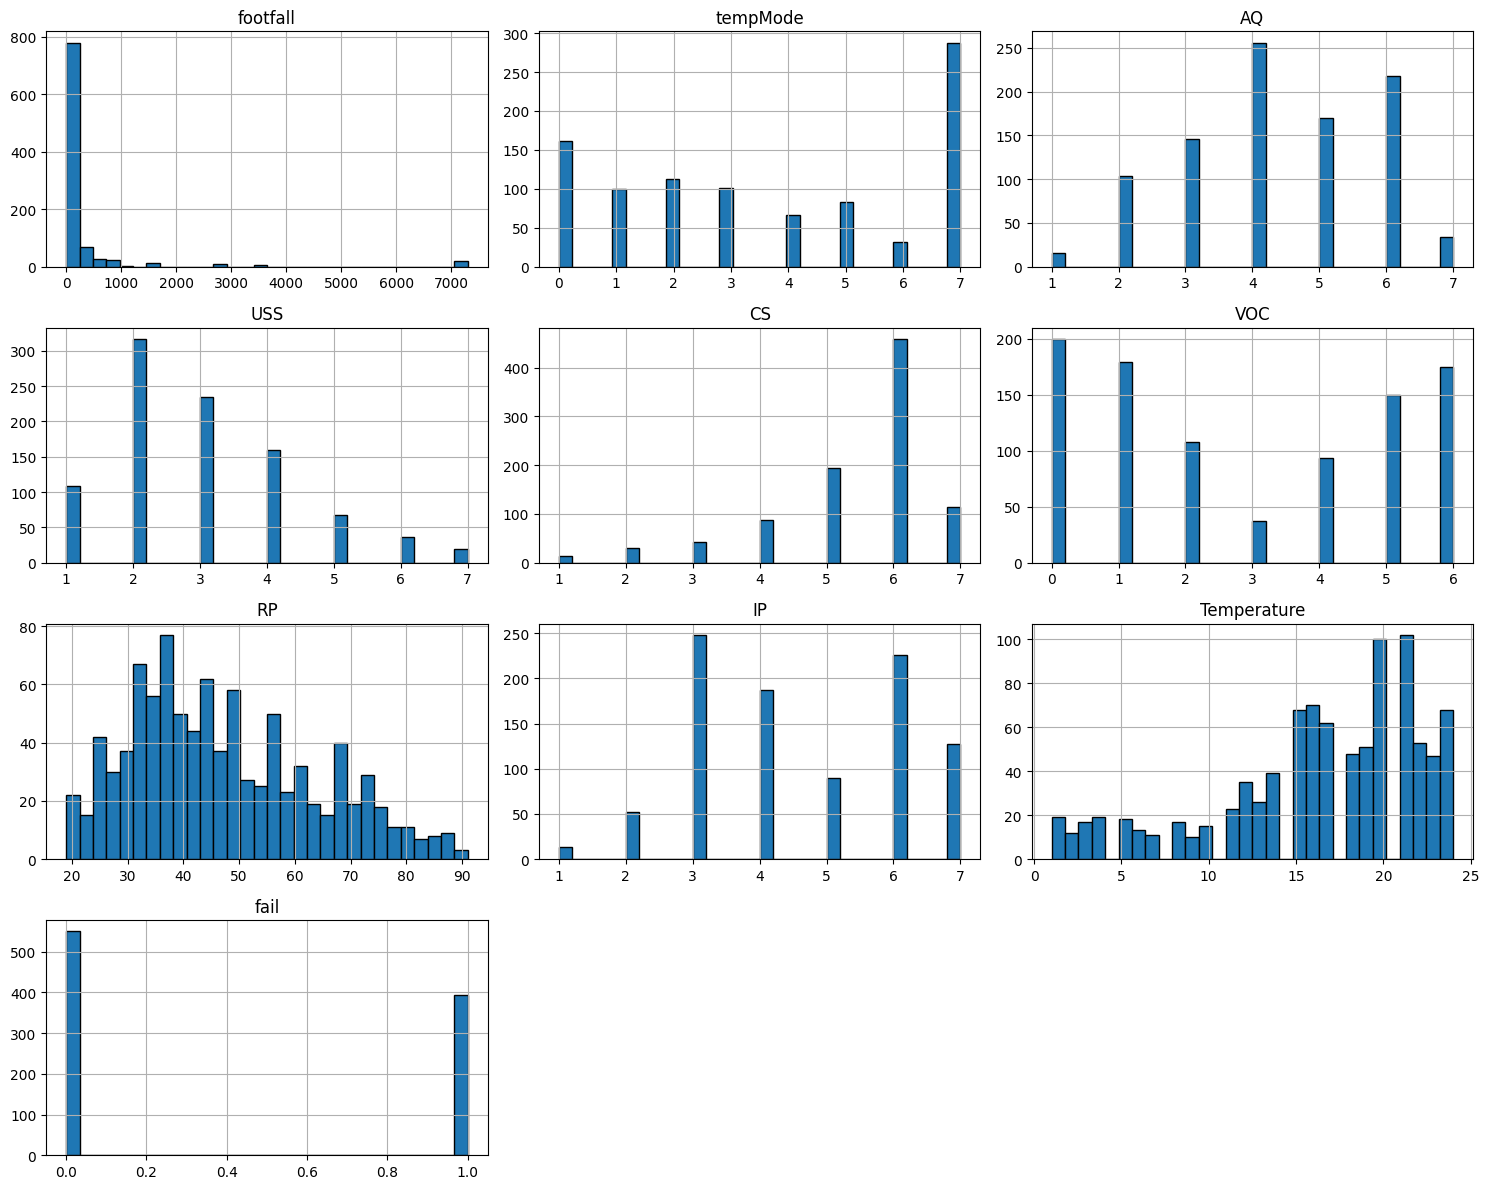

In [5]:
import matplotlib.pyplot as plt

# Set the size of the overall figure
df.hist(figsize=(15, 12), bins=30, edgecolor='black')

# Display all the plots
plt.tight_layout()
plt.show()


In [6]:
# Display the names of the columns
print("Column Names:\n")
print(df.columns.tolist())


Column Names:

['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']


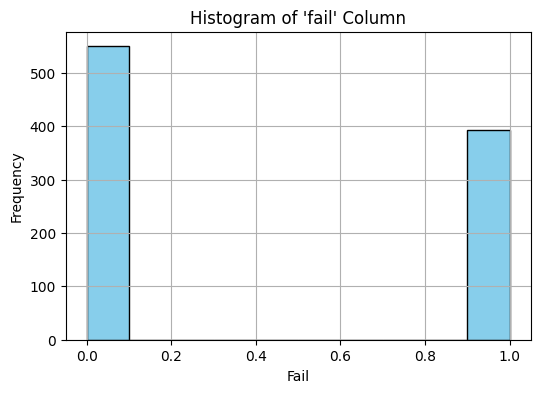

In [7]:
import matplotlib.pyplot as plt

# Plot the histogram for the 'fail' column
plt.figure(figsize=(6, 4))
plt.hist(df['fail'], bins=10, edgecolor='black', color='skyblue')
plt.title("Histogram of 'fail' Column")
plt.xlabel('Fail')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


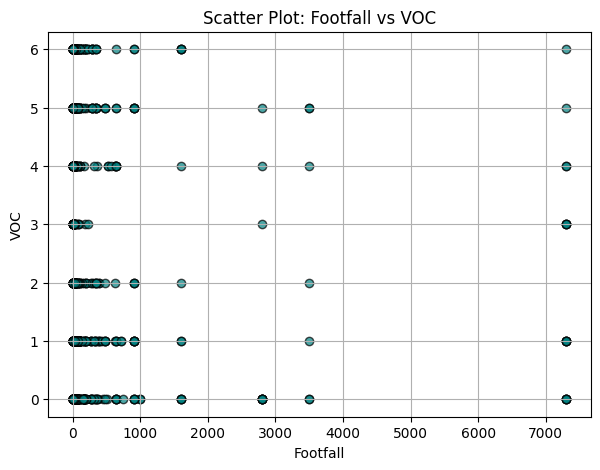

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of footfall vs VOC
plt.figure(figsize=(7, 5))
plt.scatter(df['footfall'], df['VOC'], color='teal', edgecolor='black', alpha=0.7)

plt.title("Scatter Plot: Footfall vs VOC")
plt.xlabel("Footfall")
plt.ylabel("VOC")
plt.grid(True)
plt.show()


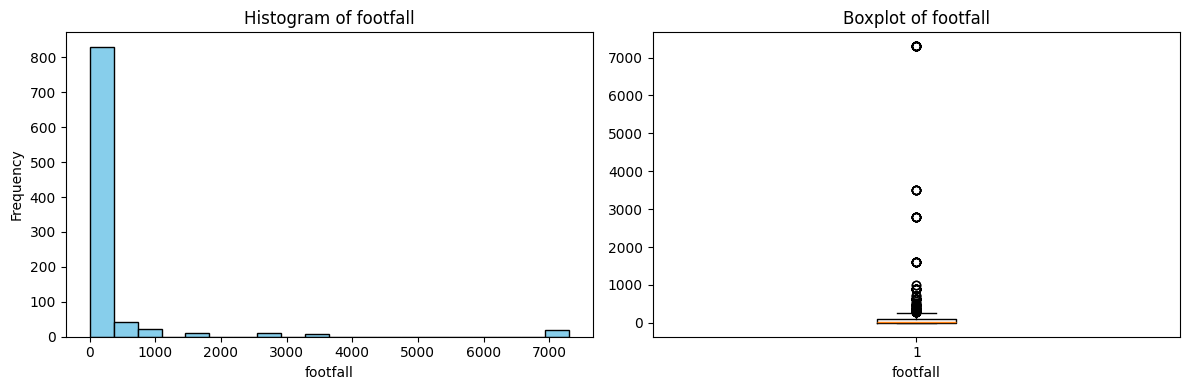

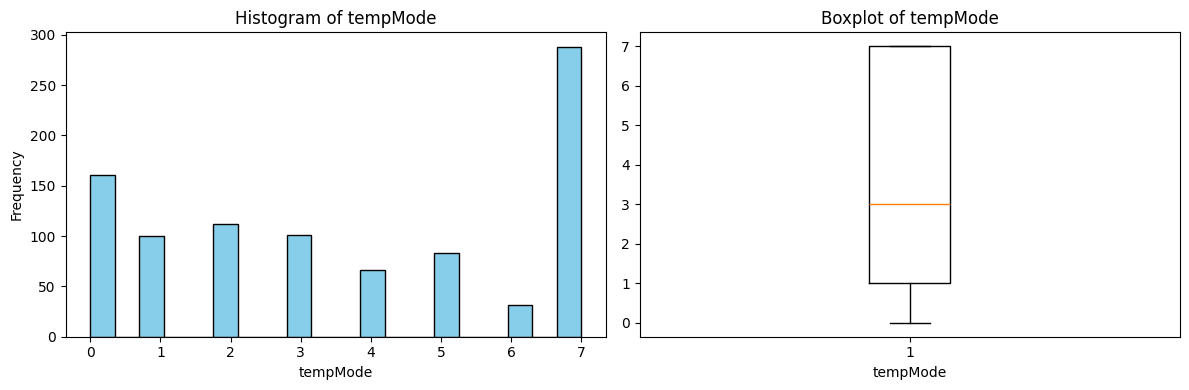

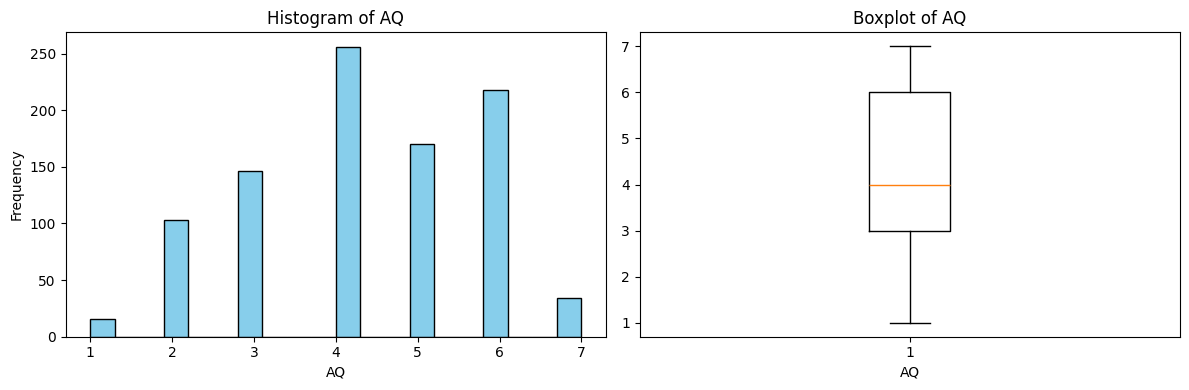

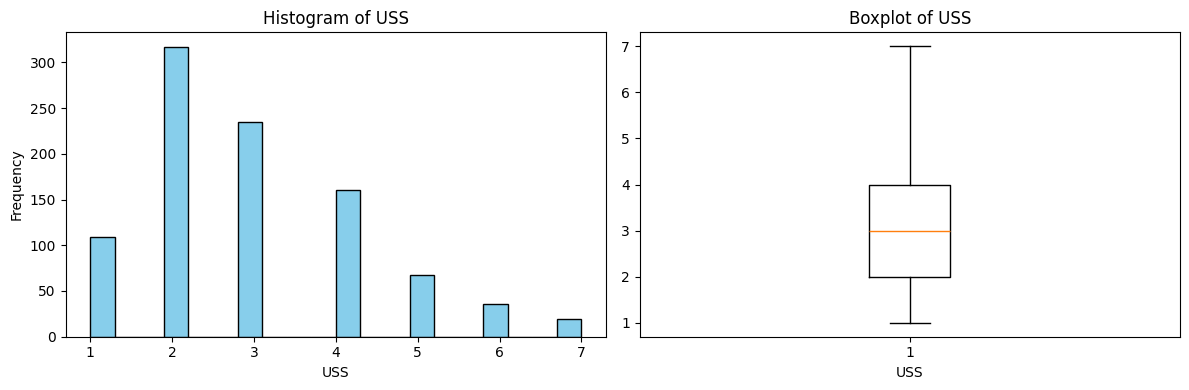

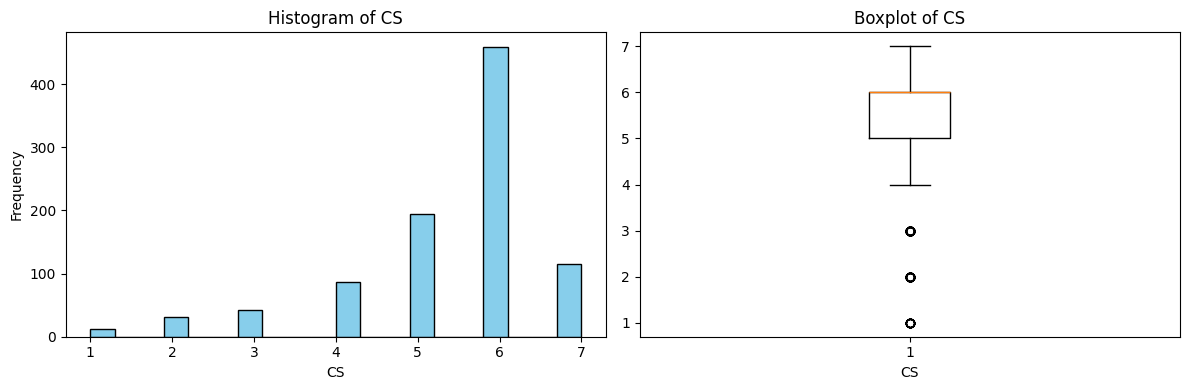

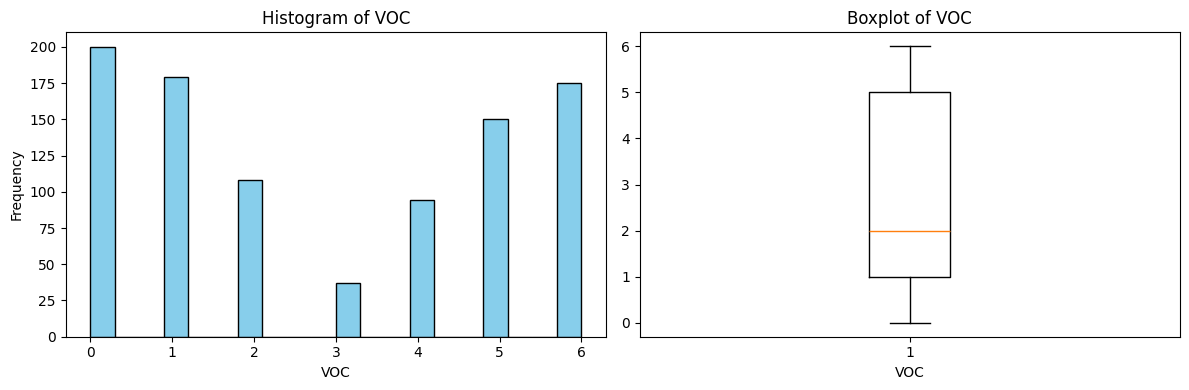

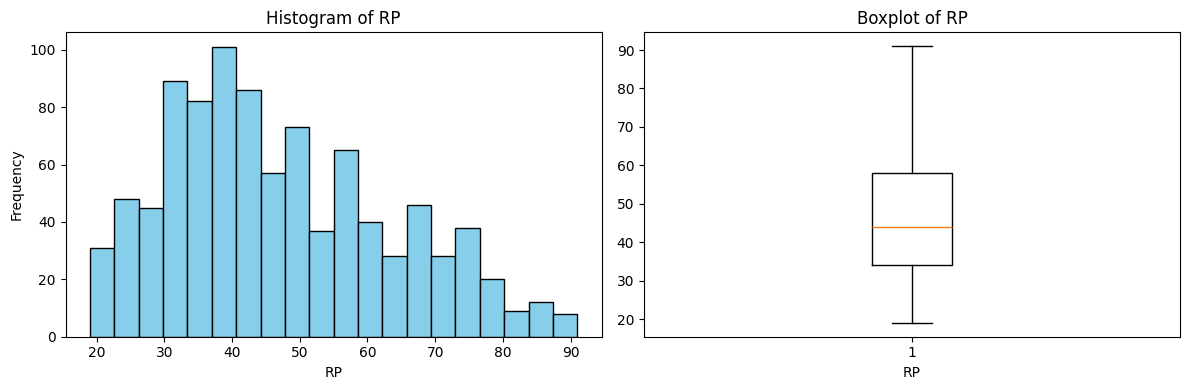

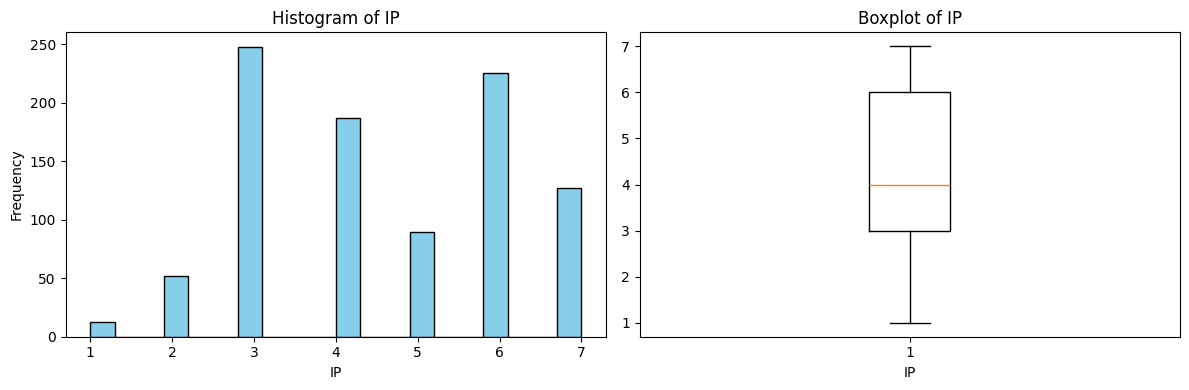

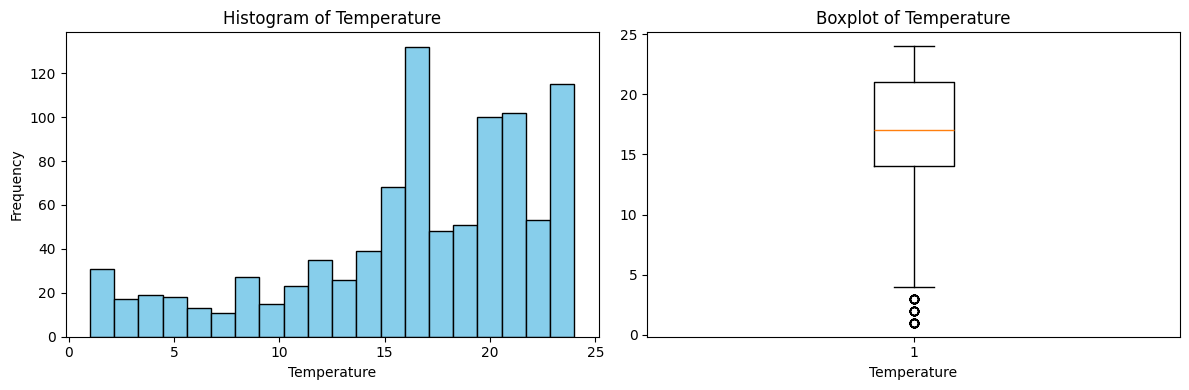

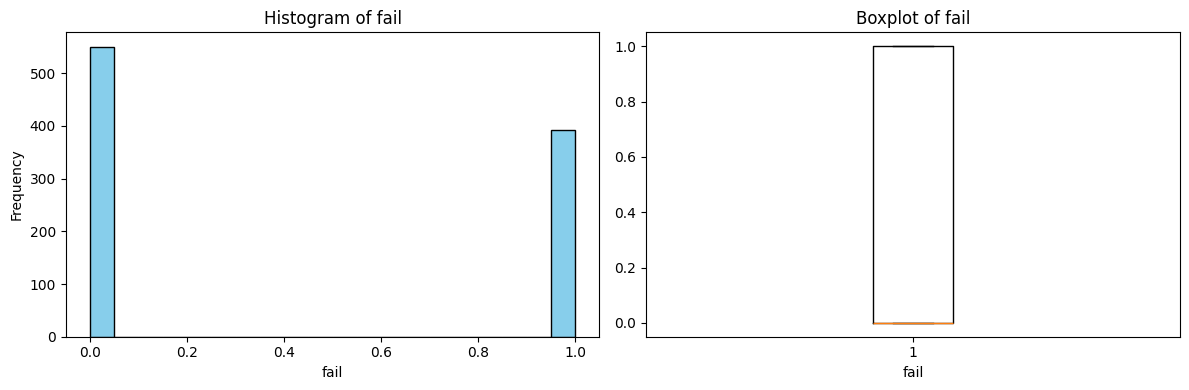

In [9]:
import matplotlib.pyplot as plt

# Loop through each column
for col in df.columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.boxplot(df[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    else:
        plt.axis('off')  # Skip boxplot for non-numeric columns

    plt.tight_layout()
    plt.show()


In [10]:
# Calculate the 1st and 3rd quartiles (Q1 and Q3)
Q1 = df['footfall'].quantile(0.25)
Q3 = df['footfall'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Set lower and upper limits for outlier detection
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")


Lower Limit: -162.5
Upper Limit: 273.5


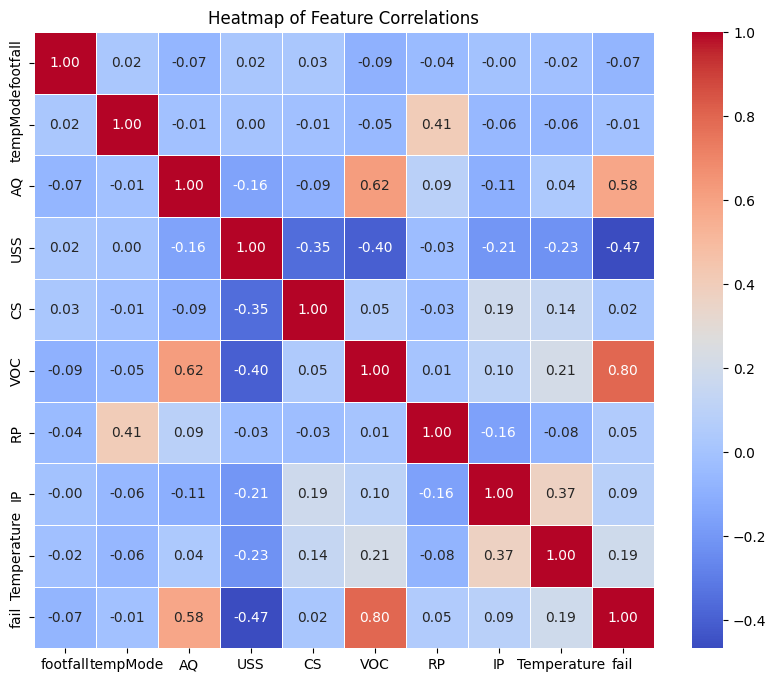

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Feature Correlations")
plt.show()


In [12]:
# Replace 'target_column_name' with your actual target column (e.g., 'fail')
target_column = 'fail'

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (943, 9)
Target (y) shape: (943,)


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training feature shape: (754, 9)
Testing feature shape: (189, 9)
Training target shape: (754,)
Testing target shape: (189,)


In [14]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Fit on training data, transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature set standardized successfully.")


Feature set standardized successfully.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.activations import relu, tanh, sigmoid


In [16]:
# Display the shape of the feature and target datasets
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialize the Sequential model
model = Sequential()

print("\nSequential model initialized.")


X_train shape: (754, 9)
X_test shape: (189, 9)
y_train shape: (754,)
y_test shape: (189,)

Sequential model initialized.


In [17]:
from tensorflow.keras.regularizers import l2

# Input Layer
model.add(Dense(9, kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.03)))

# Hidden Layers
model.add(Dense(500, kernel_initializer='he_uniform', activation='relu', kernel_regularizer=l2(0.03)))
model.add(Dense(100, kernel_initializer='random_normal', activation='relu', kernel_regularizer=l2(0.03)))


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import relu

# Initialize model (if not already)
model = Sequential()

# Input Layer
model.add(Dense(64, activation=relu, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)))

# Hidden Layer 1
model.add(BatchNormalization())
model.add(Dense(128, activation=relu, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))

# Hidden Layer 2
model.add(Dense(64, activation=relu, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

# Hidden Layer 3
model.add(Dense(32, activation=relu, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))

# Output Layer (Assuming binary classification — change `1` and `sigmoid` if it's multi-class)
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification


In [20]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")


Model compiled successfully.


In [21]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,                  # You can change this to more/less depending on performance
    batch_size=32,              # Standard mini-batch size
    validation_data=(X_test_scaled, y_test),
    verbose=1
)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5679 - loss: 6.1452 - val_accuracy: 0.5291 - val_loss: 5.3176
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5947 - loss: 5.0743 - val_accuracy: 0.5291 - val_loss: 4.4072
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6060 - loss: 4.2038 - val_accuracy: 0.5291 - val_loss: 3.6718
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6353 - loss: 3.5029 - val_accuracy: 0.5344 - val_loss: 3.0840
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6516 - loss: 2.9502 - val_accuracy: 0.5767 - val_loss: 2.6158
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6762 - loss: 2.4893 - val_accuracy: 0.6296 - val_loss: 2.2422
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7406 - loss: 2.1421 - val_accuracy: 0.6825 - val_loss: 1.9446
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7509 - loss: 1.8566 - val_accuracy: 0.6931 - val_loss

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,507 (228.55 KB)

 Trainable params: 19,459 (76.01 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 38,920 (152.04 KB)

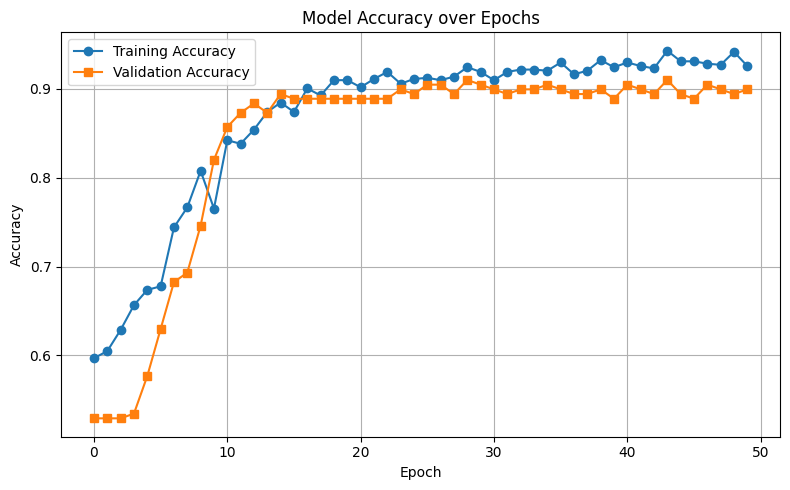

In [22]:
# Show the architecture of the model
model.summary()
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
import matplotlib.pyplot as plt
